# Description: 
This program classifies clothes from the Fashion MNIST data set using Artificial Neural Networks (ANN) and Convolutional Neural Network (CNN) !

In [0]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# Print the shape 
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# train_images[0]

In [0]:
# Normalize the pixel in the images to be values between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

Image Label:  9


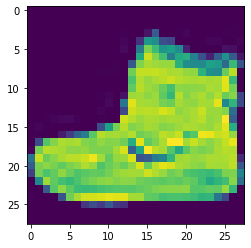

In [0]:
# View a training image
img_index = 0
img = train_images[img_index]
print("Image Label: ", train_labels[img_index])
plt.imshow(img)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
range(25)

range(0, 25)

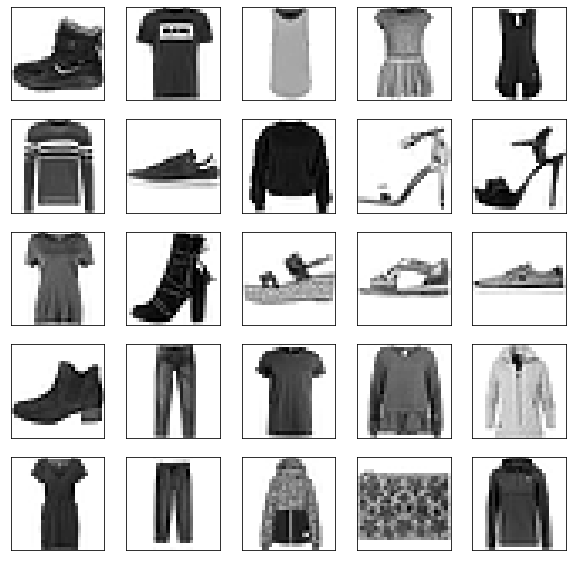

In [0]:
## 
plt.figure(figsize=(10,10))
i = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.xlabel(class_names[i])
    i += 1
plt.show()

In [0]:
# Print the shape 
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## ANN - Artificial Neural Network

- `Flattening`: The process of converting a 2d image into 1d vector
- `ReLU`: An activation function that allows a model to solve nonlinear problems
- `Softmax`: A function that provides probabilities for each possible output class
- `Classification`: A machine learning model used for distinguishing among two or more output categories

In [0]:
# Create the neural network model
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                          tf.keras.layers.Dense(128, activation=tf.nn.relu),
                          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


This network has three layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **output**  `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
# Compile the model
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Train the model
Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

In [0]:
# Train the model
hist = model.fit(train_images, train_labels, epochs = 5, batch_size = 32, shuffle = True, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5274 - accuracy: 0.8180 - val_loss: 0.4178 - val_accuracy: 0.8529
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3954 - accuracy: 0.8584 - val_loss: 0.4209 - val_accuracy: 0.8411
Epoch 3/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3554 - accuracy: 0.8722 - val_loss: 0.3815 - val_accuracy: 0.8658
Epoch 4/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3248 - accuracy: 0.8820 - val_loss: 0.3490 - val_accuracy: 0.8760
Epoch 5/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3066 - accuracy: 0.8873 - val_loss: 0.3302 - val_accuracy: 0.8829


### Evaluate the Model

In [0]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8737
Accuracy on test dataset: 0.8737000226974487


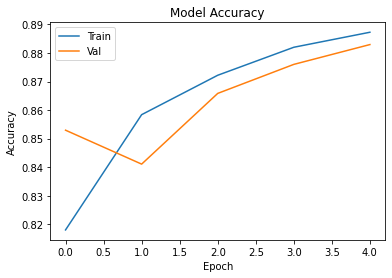

In [0]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

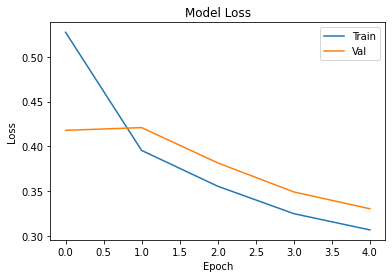

In [0]:
# Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

### Prediction on Test images

In [0]:
# Make a prediction
predictions = model.predict(test_images[0:5])
print(predictions)

# Print the predicted labels
print(np.argmax(predictions, axis=1))

# Print the actual labels
print(test_labels[0:5])

[[1.3342162e-05 1.2248347e-07 1.1008254e-05 8.9684749e-05 6.8381210e-06
  7.9114782e-03 6.8118714e-04 9.6648164e-02 7.3312607e-04 8.9390504e-01]
 [1.7642673e-05 5.3413252e-09 9.9326539e-01 4.3835837e-09 3.2565834e-03
  4.0618520e-10 3.4603046e-03 4.3212134e-10 8.6337245e-08 2.3634697e-11]
 [1.1004885e-06 9.9999881e-01 5.9420735e-10 6.3515451e-08 3.2222832e-08
  1.3452980e-09 4.1231378e-09 9.0938081e-13 1.1531376e-09 1.9171793e-11]
 [3.8764179e-07 9.9996126e-01 1.0992859e-08 3.7972997e-05 3.3428091e-07
  1.4286264e-08 5.5129036e-08 1.1423779e-10 1.0420299e-09 3.5077772e-09]
 [9.3566358e-02 5.8591453e-05 3.4347996e-02 1.1903094e-03 1.6763624e-02
  8.3061686e-06 8.5131776e-01 2.9224650e-06 2.7207879e-03 2.3398134e-05]]
[9 2 1 1 6]
[9 2 1 1 6]


Finally, use the trained model to make a prediction about a single image. 

In [0]:
# Grab an image from the test dataset
# View a training image
img_index = 0
img = test_images[img_index]
print(img.shape)
print("Image Label: ", train_labels[img_index])
# plt.imshow(img)

(28, 28)
Image Label:  9


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [0]:
# Add the image to a batch where it's the only member.
img = np.array([img])
print(img.shape)

(1, 28, 28)


Now predict the image:

In [0]:
probabilities = model.predict(img)
print(probabilities)

[[1.3342147e-05 1.2248323e-07 1.1008253e-05 8.9684654e-05 6.8381200e-06
  7.9114810e-03 6.8118703e-04 9.6648179e-02 7.3312706e-04 8.9390498e-01]]


`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [0]:
np.argmax(probabilities[0])

9

In [0]:
number_to_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
index = np.argsort(probabilities[0, :])
index


print(f'Most likely Class        : {number_to_class[index[9]] :{15}}', f'--probability: {probabilities[0, index[9]]}')
print(f'Second Most likely Class : {number_to_class[index[8]] :{15}}', f'--probability: {probabilities[0, index[8]]}')
print(f'Third Most likely Class  : {number_to_class[index[7]] :{15}}', f'--probability: {probabilities[0, index[7]]}')
print(f'Fourth Most likely Class : {number_to_class[index[6]] :{15}}', f'--probability: {probabilities[0, index[6]]}')
print(f'Fifth Most likely Class  : {number_to_class[index[5]] :{15}}', f'--probability: {probabilities[0, index[5]]}')

Most likely Class        : Ankle boot      --probability: 0.893904983997345
Second Most likely Class : Sneaker         --probability: 0.09664817899465561
Third Most likely Class  : Sandal          --probability: 0.007911480963230133
Fourth Most likely Class : Bag             --probability: 0.0007331270608119667
Fifth Most likely Class  : Shirt           --probability: 0.0006811870262026787


### Probability distribution plotting

## CNN - Convolutional Neural Network
- `CNN`: Convolutional neural network. That is, a network which has at least one convolutional layer. A typical CNN also includes other types of layers, such as pooling layers and dense layers.

- `Convolution`: The process of applying a kernel (filter) to an image
Kernel / filter: A matrix which is smaller than the input, used to transform the input into chunks

- `Padding`: Adding pixels of some value, usually 0, around the input image

- `Pooling`: The process of reducing the size of an image through downsampling.There are several types of pooling layers. For example, average pooling converts many values into a single value by taking the average. However, maxpooling is the most common.

- `Maxpooling`: A pooling process in which many values are converted into a single value by taking the maximum value from among them.

- `Stride`: the number of pixels to slide the kernel (filter) across the image.

- `Downsampling`: The act of reducing the size of an image

In [0]:
## Install Keras Tuner for tunning hyperparameters
# !pip install keras-tuner

In [0]:
## check image shape
print(train_images[0].shape)

(28, 28)


In [0]:
# ## Reshapping train and test data
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

print("Train Image Shape: ", train_images.shape)
print("Test Image Shape: ", test_images.shape)

Train Image Shape:  (60000, 28, 28, 1)
Test Image Shape:  (10000, 28, 28, 1)


In [0]:
print(train_labels.shape)
train_labels = train_labels.reshape(len(train_labels), 1)
print(train_labels.shape)

(60000,)
(60000, 1)


In [0]:
# Build the CNN 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create the architecture
model = Sequential([
    # Convolution Layer
    Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    # MaxPooling Layer
    MaxPooling2D((2, 2), strides=2),

    # Convolution Layer
    Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    # MaxPooling Layer
    MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

Using TensorFlow backend.


This network layers are:

* **"convolutions"** `tf.keras.layers.Conv2D and MaxPooling2D`— Network start with two pairs of Conv/MaxPool. The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding, and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). After that, the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2. The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer. So far in the course, we have described what a Convolution does, but we haven't yet covered how you chain multiples of these together. We will get back to this in lesson 4 when we use color images. At this point, it's enough if you understand the kind of operation a convolutional filter performs

* **output** `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [0]:
# Train the model
hist = model.fit(train_images, train_labels, epochs = 10, shuffle = True, batch_size = 32, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 304us/step - loss: 0.4436 - accuracy: 0.8415 - val_loss: 0.3392 - val_accuracy: 0.8783
Epoch 2/10
42000/42000 [==============================] - 12s 285us/step - loss: 0.2882 - accuracy: 0.8956 - val_loss: 0.3182 - val_accuracy: 0.8878
Epoch 3/10
42000/42000 [==============================] - 13s 301us/step - loss: 0.2413 - accuracy: 0.9115 - val_loss: 0.2554 - val_accuracy: 0.9097
Epoch 4/10
42000/42000 [==============================] - 12s 297us/step - loss: 0.2070 - accuracy: 0.9246 - val_loss: 0.2421 - val_accuracy: 0.9137
Epoch 5/10
42000/42000 [==============================] - 12s 279us/step - loss: 0.1794 - accuracy: 0.9340 - val_loss: 0.2509 - val_accuracy: 0.9121
Epoch 6/10
42000/42000 [==============================] - 12s 291us/step - loss: 0.1531 - accuracy: 0.9432 - val_loss: 0.2409 - val_accuracy: 0.9191
Epoch 7/10
42000/42000 [==============================] 

### Evaluate the model

In [0]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy on test dataset:', test_accuracy)

10000/10000 [==============================] - 1s 117us/step
Accuracy on test dataset: 0.9103000164031982


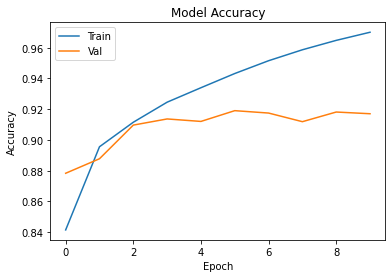

In [0]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

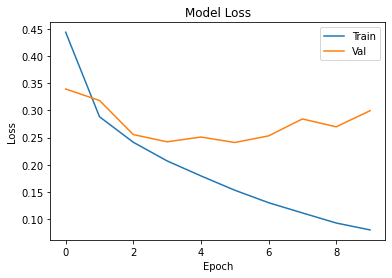

In [0]:
# Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

From 'Model Accuracy' and 'Model Loss' plots, it can be clearly seen that model is overfitting and hence it will give us poor performance for the unseen data.

This problem can be resolved using "Image Augumentation" technique. There are many other techniques. 

### Prediction on Test images

In [0]:
# Make a prediction
predictions = model.predict(test_images[0:5])
print(predictions)

# Print the predicted labels
print(np.argmax(predictions, axis=1))

# Print the actual labels
print(test_labels[0:5])

[[2.50235388e-09 5.57261079e-14 8.49397289e-11 3.24209028e-11
  4.51188913e-11 5.46294707e-08 1.24695657e-10 7.44842237e-06
  1.80188878e-10 9.99992490e-01]
 [5.71364254e-08 2.89696449e-15 1.00000000e+00 4.33508237e-13
  3.52356433e-09 8.08431737e-18 7.90356047e-09 8.50276422e-17
  2.67456556e-16 1.18028661e-13]
 [1.12695714e-13 1.00000000e+00 7.99570875e-19 3.36732798e-14
  4.10469926e-22 7.27939053e-21 1.95277015e-18 9.43707583e-26
  2.38944510e-19 5.36187997e-28]
 [3.94615899e-13 1.00000000e+00 2.57850990e-16 7.20301531e-13
  5.52400245e-15 6.59221506e-18 5.39826210e-15 3.55864368e-21
  1.16978195e-17 1.83124580e-21]
 [4.03653622e-01 2.07442785e-10 9.97872930e-03 1.19651759e-06
  7.91823433e-04 8.13974488e-09 5.85568786e-01 5.89307274e-06
  7.78342724e-10 4.53902445e-08]]
[9 2 1 1 6]
[9 2 1 1 6]


In [0]:
predictions[0]
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Finally, use the trained model to make a prediction about a single image. 

In [0]:
# Grab an image from the test dataset
# View a training image
img_index = 0
img = test_images[img_index]
print(img.shape)
print("Image Label: ", train_labels[img_index])
# plt.imshow(img)

(28, 28, 1)
Image Label:  [9]


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [0]:
# Add the image to a batch where it's the only member.
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


Now predict the image:

In [0]:
probabilities = model.predict(img)
print(probabilities)

[[2.5023585e-09 5.5726213e-14 8.4939729e-11 3.2420965e-11 4.5118891e-11
  5.4629471e-08 1.2469566e-10 7.4484224e-06 1.8018818e-10 9.9999249e-01]]


`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [0]:
np.argmax(probabilities[0])

9

In [0]:
number_to_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
index = np.argsort(probabilities[0, :])
index


print(f'Most likely Class        : {number_to_class[index[9]] :{15}}', f'--probability: {probabilities[0, index[9]]}')
print(f'Second Most likely Class : {number_to_class[index[8]] :{15}}', f'--probability: {probabilities[0, index[8]]}')
print(f'Third Most likely Class  : {number_to_class[index[7]] :{15}}', f'--probability: {probabilities[0, index[7]]}')
print(f'Fourth Most likely Class : {number_to_class[index[6]] :{15}}', f'--probability: {probabilities[0, index[6]]}')
print(f'Fifth Most likely Class  : {number_to_class[index[5]] :{15}}', f'--probability: {probabilities[0, index[5]]}')

Most likely Class        : Ankle boot      --probability: 0.9999924898147583
Second Most likely Class : Sneaker         --probability: 7.448422365996521e-06
Third Most likely Class  : Sandal          --probability: 5.462947072487623e-08
Fourth Most likely Class : T-shirt/top     --probability: 2.5023585425998363e-09
Fifth Most likely Class  : Bag             --probability: 1.8018818381815294e-10
